# ISYS2407 Information Systems Solutions & Design

# Assignment 3 

# Scaling and Model Building: Model 2

#### Student name:  Hewa Pattinige Kemith Nanayakkara

#### Student number: S3758840

# 1 Import libraries

In [1]:
# Import the library for pickling
import joblib

# Library needed for counting categorical values
import collections

# Also need pandas here
import pandas as pd

# Library to scale values
from sklearn.preprocessing import StandardScaler

# Library for replacing labels with numbers
from sklearn.preprocessing import LabelEncoder

# Libary needed for onehot encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
# Just use pandas get_dummies which is a lot easier to use

# Library for splitting the data into train and test sets
from sklearn.model_selection import train_test_split 

# Import the model library
from sklearn.neighbors import KNeighborsClassifier

# Library for performing grid search
from sklearn.model_selection import GridSearchCV

# Import the libraries for computing the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# 2 Load the cleaned data

#### Pickled file must exist in your folder

In [2]:
# Load the pickled file
employeeattrition_df = joblib.load('employeeattrition.pkl')  

# Check
employeeattrition_df.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,...,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,Unsatisfied,Female,94,...,Very Unsatisfied,0,8,0,Extremely Unbalanced,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,Satisfied,Male,61,...,Very Satisfied,1,10,3,Balanced,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,Very Satisfied,Male,92,...,Unsatisfied,0,7,3,Balanced,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Very Satisfied,Female,56,...,Satisfied,0,8,3,Balanced,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,Very Unsatisfied,Male,40,...,Very Satisfied,1,6,3,Balanced,2,2,2,2,0


# 3 Split the data into training and testing set

In [3]:
# Store the features in variable X (uppercase as there are multiple features)
feature_cols = ['age', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'overtime',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager']

X = employeeattrition_df[feature_cols]

# Store the labels/target in variable y (lower case as its a single value)
y = employeeattrition_df['attrition']

# Split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # keep 20% for testing
                                                    random_state=2 # pass an int for reproducible rtesult
                                                    )

# 4 Data Transformations to improve modelling performance

## 4.1 Scale the columns with continuous values

In [4]:
# 1. Select the columns to scale
columns_to_scale = [
                    'age', 
                    'daily_rate',
                    'distance_from_home', 
                    'hourly_rate',
                    'monthly_income', 
                    'monthly_rate',
                    'total_working_years', 
                    'training_times_last_year',
                    'years_at_company', 
                    'years_in_current_role',
                    'years_with_curr_manager'
    
]

# 2. Make copy of the training and testing sets fix the issue below
X_train = X_train.copy()
X_test = X_test.copy()

# 3. Instantiate a scaler
scaler = StandardScaler()
    
# 4. Fit the scaler on the training column and transform the training and testing columns   
for col in columns_to_scale:
    # Must reshape the numpy array returned b the scaler from 1D to 2D
    scaler.fit(X_train[col].values.reshape(-1, 1))
    # Then transform both the training and testing sets
    X_train[col] = scaler.transform(X_train[col].values.reshape(-1, 1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1, 1))

# Check
print(X_train.shape, X_test.shape)

(1176, 30) (294, 30)


In [5]:
# Check again
X_train.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
285,0.020782,Travel_Rarely,1.397274,Research & Development,-1.017288,3,Life Sciences,Very Satisfied,Female,-1.164539,...,3,Unsatisfied,0,0.738591,0.172468,Balanced,1.658942,2.125569,5,0.790100
194,0.901489,Non-Travel,0.964352,Research & Development,-0.893162,2,Medical,Very Unsatisfied,Male,-0.023456,...,4,Very Satisfied,1,1.378762,-1.387702,Balanced,2.153638,1.032220,11,1.066471
323,-0.970013,Travel_Rarely,0.871408,Research & Development,-0.893162,4,Medical,Very Unsatisfied,Male,0.919177,...,3,Very Satisfied,0,-0.797818,0.952553,Unbalanced,-0.649639,-0.607803,2,-0.591753
1015,-0.309483,Travel_Frequently,-0.588787,Research & Development,-1.017288,4,Other,Very Satisfied,Male,1.266463,...,3,Satisfied,2,-0.157647,-0.607617,Balanced,-0.484740,-0.334466,1,-0.315382
1003,-1.300279,Travel_Rarely,0.362663,Research & Development,-1.017288,3,Technical Degree,Very Unsatisfied,Male,0.770340,...,3,Unsatisfied,1,-0.541750,-0.607617,Unbalanced,-0.649639,-0.607803,0,-0.591753


In [6]:
# Check again
X_test.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
721,1.451931,Travel_Rarely,0.338204,Research & Development,1.837621,3,Life Sciences,Very Satisfied,Male,1.464912,...,3,Very Satisfied,1,1.378762,-0.607617,Balanced,0.834449,1.852232,1,0.237359
843,-1.190190,Travel_Rarely,1.426624,Research & Development,-0.769035,4,Medical,Very Unsatisfied,Male,0.819953,...,4,Unsatisfied,1,-0.413716,-0.607617,Balanced,0.174854,0.758883,0,0.790100
627,1.672108,Travel_Frequently,0.218356,Research & Development,1.961748,4,Medical,Satisfied,Female,0.770340,...,4,Satisfied,0,2.531069,0.172468,Balanced,0.339753,1.032220,0,-1.144494
1368,-0.309483,Travel_Frequently,-0.160757,Research & Development,1.589368,4,Other,Satisfied,Male,1.018402,...,3,Unsatisfied,0,0.610557,0.172468,Balanced,1.329145,1.578894,6,1.895582
305,-0.089306,Non-Travel,0.744222,Research & Development,1.837621,4,Life Sciences,Unsatisfied,Female,-0.916477,...,3,Satisfied,1,-0.029613,0.172468,Balanced,0.339753,1.032220,0,1.066471


## 4.2 Label Encoding Data Transformation

In [7]:
# 1. Select the columns to label encode
columns_to_encode = ['business_travel', 'department',
    # gender,
    'education_field', 'environment_satisfaction', 'job_role',
    'job_satisfaction', 'marital_status', 'overtime', 
    'relationship_satisfaction', 'work_life_balance'   
]

# 2. Make copy of the training and testing sets fix the issue below
X_train = X_train.copy()
X_test = X_test.copy()

# 3. Instantiate a LabelEncoder
encoder = LabelEncoder()

# 4. Fit the encoder on the training column and transform the training and testing columns
for col in columns_to_encode:
    # First fit the encoder to the training data
    encoder.fit(X_train[col])
    # Then transform both the training and the testing sets
    X_train[col] = encoder.transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

# Check
X_train.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
285,0.020782,2,1.397274,1,-1.017288,3,1,2,Female,-1.164539,...,3,1,0,0.738591,0.172468,0,1.658942,2.125569,5,0.790100
194,0.901489,0,0.964352,1,-0.893162,2,3,3,Male,-0.023456,...,4,2,1,1.378762,-1.387702,0,2.153638,1.032220,11,1.066471
323,-0.970013,2,0.871408,1,-0.893162,4,3,3,Male,0.919177,...,3,2,0,-0.797818,0.952553,3,-0.649639,-0.607803,2,-0.591753
1015,-0.309483,1,-0.588787,1,-1.017288,4,4,2,Male,1.266463,...,3,0,2,-0.157647,-0.607617,0,-0.484740,-0.334466,1,-0.315382
1003,-1.300279,2,0.362663,1,-1.017288,3,5,3,Male,0.770340,...,3,1,1,-0.541750,-0.607617,3,-0.649639,-0.607803,0,-0.591753


## 4.3 Label Hotcoding Data Transformation

In [8]:
# 1. Select the columns to one-hot encode 
columns_to_onehot_encode = [
#   'business_travel', 'department',
    'gender',
#   'education_field', 'environment_satisfaction', 'job_role',
#   'job_satisfaction', 'marital_status', 'overtime', 
#   'relationship_satisfaction', 'work_life_balance'
]

# 2 Instantiate a one-hot encoder

enc = LabelBinarizer()

# 3. Fit the encoder on the training column and transform the training and testing columns

for col in columns_to_onehot_encode:
    # Option 1. Using pandas (simpler than sklearn)
    ## Fix X_train
    dummies_df = pd.get_dummies(X_train[col], prefix="gdr") # generate dataframe of dummies
    X_train.drop([col], axis=1, inplace=True) # drop original column
    X_train = pd.concat([X_train, dummies_df], axis=1) # concatenate both dataframes
    ## Fix X_test
    dummies_df = pd.get_dummies(X_test[col], prefix="gdr")
    X_test.drop([col], axis=1, inplace=True)
    X_test = pd.concat([X_test, dummies_df], axis=1)
     
# Check
X_train.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,hourly_rate,job_involvement,...,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,gdr_Female,gdr_Male
285,0.020782,2,1.397274,1,-1.017288,3,1,2,-1.164539,3,...,0,0.738591,0.172468,0,1.658942,2.125569,5,0.790100,1,0
194,0.901489,0,0.964352,1,-0.893162,2,3,3,-0.023456,2,...,1,1.378762,-1.387702,0,2.153638,1.032220,11,1.066471,0,1
323,-0.970013,2,0.871408,1,-0.893162,4,3,3,0.919177,1,...,0,-0.797818,0.952553,3,-0.649639,-0.607803,2,-0.591753,0,1
1015,-0.309483,1,-0.588787,1,-1.017288,4,4,2,1.266463,3,...,2,-0.157647,-0.607617,0,-0.484740,-0.334466,1,-0.315382,0,1
1003,-1.300279,2,0.362663,1,-1.017288,3,5,3,0.770340,3,...,1,-0.541750,-0.607617,3,-0.649639,-0.607803,0,-0.591753,0,1


# 5 Modelling

## 5.1 Initial/baseline model

### 5.1.1 Fit initial model

In [9]:
# Instantiate model and fit on training data
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

# Predict using test data
y_pred = knn_model.predict(X_test)

# Quick check
print(y_pred[:5])


[0 0 0 0 0]


### 5.1.1 Evaluate model

accuracy: 0.8367346938775511
precision: 0.5
recall: 0.10416666666666667
F1 score: 0.1724137931034483
[[241   5]
 [ 43   5]]


Text(50.0, 0.5, 'True')

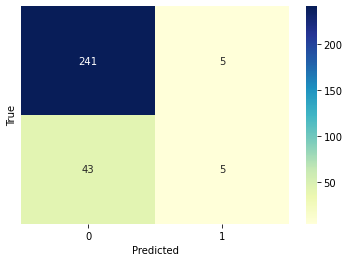

In [10]:
# Compute performance metrics of the baseline model
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1}")

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

# visualise the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt="d", yticklabels=False, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')

# Continue with the rest of the modelling steps - e.g.

## 5.2 Improved model

### 5.2.1 Use grid search to find best hyperameters (details in grid search notebook)

In [11]:
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# List of relevant params
#     n_neighbors:int, default=5
#     weights: {‘uniform’, ‘distance’} or callable, default=’uniform’
#     algorithm: {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
param_grid = [
              {"n_neighbors": range(1, 50)},
              {"n_neighbors": range(1, 50), "weights": ["uniform", "distance"]}
             ]

# Instantiate a grid search object and fit it to the training data
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, param_grid, verbose=0, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print(f"Best params: {grid.best_params_}, score: {grid.best_score_:0.2f}")

Best params: {'n_neighbors': 1}, score: 0.26


### 5.2.2 Fit improved model

In [12]:
# Instantiate model and fit on training data
knn_model = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

# Predict using test data
y_pred = knn_model.predict(X_test)

# Quick check
print(y_pred[:5])

[0 0 0 0 0]


### 5.2.3 Evaluate  improved model

accuracy: 0.8095238095238095
precision: 0.36666666666666664
recall: 0.22916666666666666
F1 score: 0.28205128205128205
[[227  19]
 [ 37  11]]


Text(50.0, 0.5, 'True')

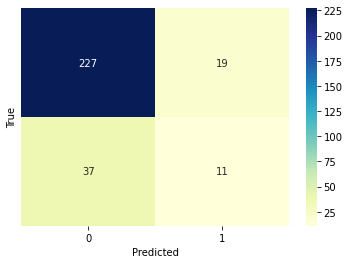

In [13]:
# Compute performance metrics of the baseline model
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1}")

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

# visualise the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt="d", yticklabels=False, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')

# 6 Save the model for further evaluation (in another notebook)
#### Should also save the train/test sets

In [14]:
# Pickle the model for later evaluation
joblib.dump(knn_model, 'model-knn.pkl')  # # Use the right model name and a suitable file name

# Also need to pickle the training and testing sets
joblib.dump(X_train, 'X_train.pkl') 
joblib.dump(X_test, 'X_test.pkl') 
joblib.dump(y_train, 'y_train.pkl') 
joblib.dump(y_test, 'y_test.pkl')

# Note: make sure that the model and the training/testing sets match 
# i.e. the model was built using this particular training set
# and the testing set matches this partiular training

['y_test.pkl']